# **DSCI 100 Project**

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



## Activity #1 to #3 ##

In [3]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


**Description:**

The dataset consists of data for MineCraft video game players of different ages with varying levels of experience in gaming and number of hours played.  The logistics of their name, gender, (age), email and whether they have subscribed to the newsletter have been recorded.  There are 7 variables and 196 observations in the dataset.

**Outcome Variable:**
The main outcome/categorical/label variable in the dataset is the 'subscribe' variable which describes whether or not a player has subscribed to the Minecraft newsletter.  Thus, there are two groups within the category: "TRUE" or "FALSE".  We can double check using the distinct function below.


In [4]:
players |>
    distinct(subscribe)

subscribe
<lgl>
TRUE
FALSE


To determine the number of observations in each group of "TRUE" or "FALSE", we can group the observations according to the 'subscribe' variable and summarize the number of counts or observations in each group.

In [5]:
players |>
    group_by(subscribe) |>
    summarize(count = n())

subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


From the tibble above, we can see that there are 144 players who have subscribed to the gaming newsletter but 52 players who have not done so yet.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


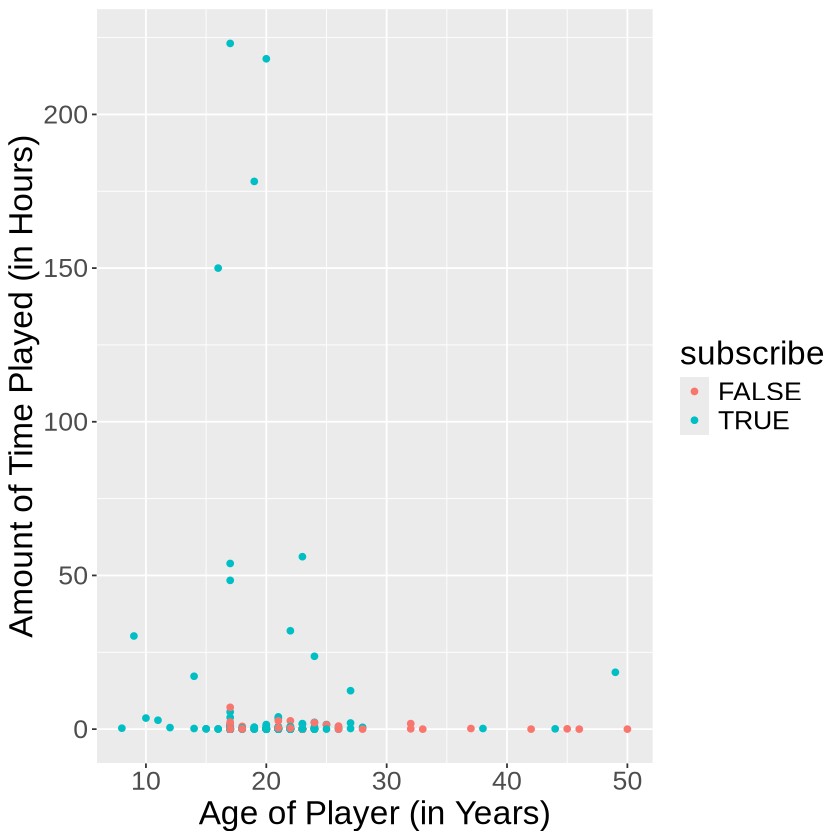

In [6]:
players_scatter <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_point(aes(color = subscribe)) +
        xlab("Age of Player (in Years)") +
        ylab("Amount of Time Played (in Hours)") +
        theme(text = element_text(size = 20))
players_scatter

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_line()`).”


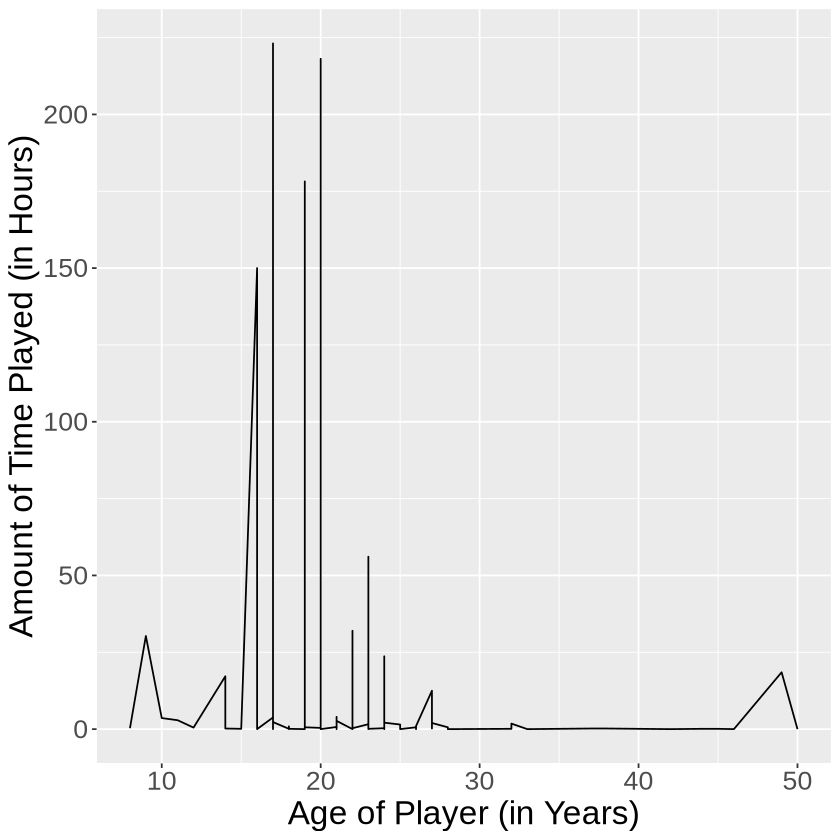

In [7]:
players_scatter <- players |>
    ggplot(aes(x = Age, y = played_hours)) +
        geom_line() +
        xlab("Age of Player (in Years)") +
        ylab("Amount of Time Played (in Hours)") +
        theme(text = element_text(size = 20))
players_scatter

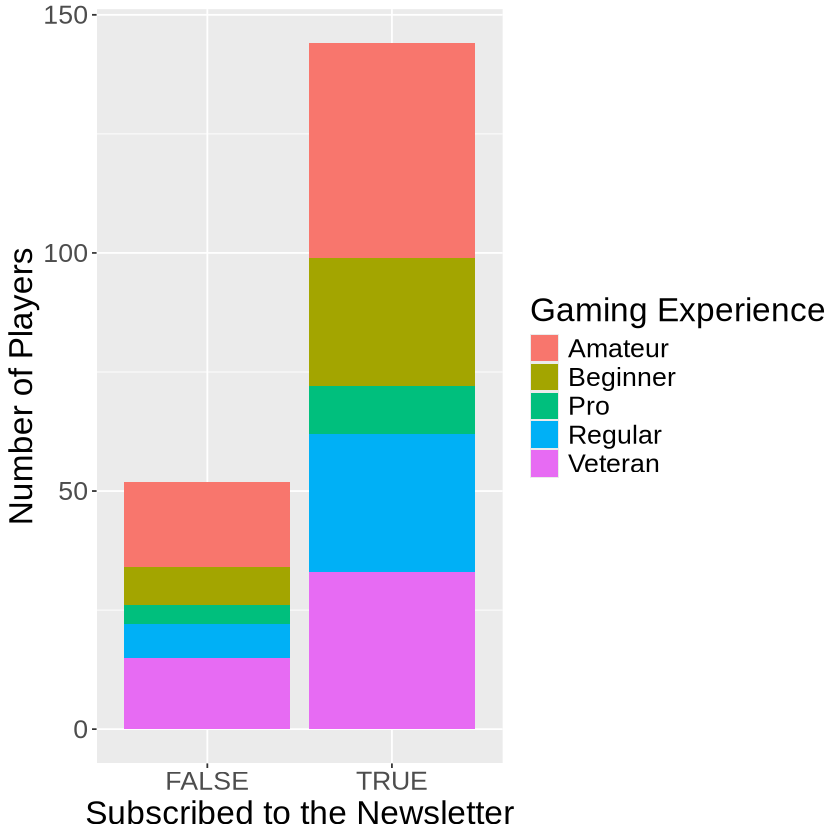

In [8]:
players_scatter <- players |>
    ggplot(aes(x = subscribe, fill = experience)) +
        geom_bar() +
        xlab("Subscribed to the Newsletter") +
        ylab("Number of Players") +
        labs(fill = "Gaming Experience") +
        theme(text = element_text(size = 20))
players_scatter

In [10]:
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


**Description:**

The dataset contains the the start and end times of all individual play sessions for each player.  There are 5 variables and 1535 observations in the dataset.  

What I notice: Should the values in the start_time and end_time columns be date-time data type instead of character?  Sure!
What do the original_start_time and original_end_time mean?